# 16 - Pontos de Interesse e casamento de imagens

Neste roteiro iremos estudar o comportamento de algoritmos de detecção e descrição de pontos de interesse e como usá-los para fazer uma versão simplificada de um algoritmo de busca de imagens. 

## AVISO

Existe uma grande quantidade de tutoriais online com códigos de exemplo para este problema, mas **seu uso não é recomendado**. Além de muitos conterem material claramente desatualizado, muitos tutoriais encorajam um simples copiar-colar de código sem levar em conta as *ideias que o motivaram*. Nesta atividade recomendamos usar, como material complementar, a [documentação do OpenCV em Python](https://docs.opencv.org/3.4.3/d6/d00/tutorial_py_root.html) sobre [Feature Detection and Description](https://docs.opencv.org/3.4.3/db/d27/tutorial_py_table_of_contents_feature2d.html).

## Banco de imagens para a aula

Neste primeiro roteiro iremos trabalhar com um conjunto de imagens que não é focado exclusivamente em recuperação de informação, mas sim em detecção de objetos. Iremos usar a versão de 2005 do [Pascal VOC Challenge](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1), que você já deve ter baixado. Se não baixou ainda, o download não é pequeno (465Mb) então deixe baixando e prossiga com o roteiro. 


## Pesquisa

1. Detectores de pontos de interesse são classificados, basicamente, em três tipos. Quais são eles e quais características locais das imagens são exploradas?

Corner detection- Detecta pontos onde possui o encontro de duas retas que que vem de direcoes diferentes em suas proximidades

Blob detection- Compara a questão de brilho e cor de uma imagem em uma região

Edge detection- Compara a questão de brilho em um ponto local



2. O OpenCV possui diversos algoritmos para detecção e descrição de pontos de interesse. Faça uma lista deles abaixo (deixando bem claro qual método faz detecção, extração ou ambos). Coloque o nome do método, a classe que o implementa e seu tipo (para os detectores somente).

Harris Corner Detection - Faz uma mistura entre corner e edge detector - deteccao

Shi-Tomasi Corner Detector & Good Features to Track - Procura por harder corners - apenas descricao

Introduction to SIFT (Scale-Invariant Feature Transform) - Detecta corners mesmo que tenha feito umas escala - deteccao e descricao

Introduction to SURF (Speeded-Up Robust Features) - Utiliza o blob detection - deteccao

FAST Algorithm for Corner Detection - detector de corner com uma velocidade maior - deteccao

BRIEF (Binary Robust Independent Elementary Features)

3. Escolha um dos métodos acima e descreva sua ideia básica no campo abaixo. Você deve indicar em qual artigo ele foi proposto, quais suas características marcantes em relação aos outros métodos e uma aplicação em que este descritor obteve resultados relavantes. 

*sua resposta aqui*

## Implementação

Vamos agora implementar o método de similaridade de imagens descrito na aula expositiva, resumido abaixo. Você receberá como entrada uma imagem de busca $Q$ e um banco de imagens $\{F^i\}_{i=0}^N$ contendo $N$ imagens.

1. Detecte os pontos de interesse e extraia os descritores $\{q_j\}$ de $Q$
2. Para cada imagem $F^i$:
    - Detecte os pontos de interesse e extraia os descritores $\{F_k\}$ de $F^i$ 
    - Para cada descritor $q_j$, verifique se existe um descritor $F_k$ que casa com ele
    - Calcule a proporção de descritores de $Q$ que casaram com descritores de $F^i$ e use este valor como a similaridade entre as duas imagens.
    
3. Retorne as 5 imagens com maior similaridade;

### Exercício

Antes de continuar, leia com atenção o algoritmo acima e pense: como você organizaria seu código para implementá-lo? Quais funções auxiliares criaria e quais argumentos cada uma receberia? Supondo que todas essas funções auxiliares já foram implementadas, como seria o código principal de seu programa?

*organização do programa aqui*

-detectar os pontos notaveis da imagem(pixel)

-match de descritor(saida dos pontos notaveis)


In [10]:
# seu código esboço aqui
def similarity(img,img_list):
    q=return_descriptor(img)
    for f in (img_list):
        Fk=return_descriptor(f)
        if Fk==q:
            similar=match_descriptor(img1,img2)
            similar_list.append(similar)

### Extração e descrição de pontos de interesse

A detecção e descrição de pontos de interesse é um processo que será repetido várias vezes nesta e na próxima atividade. Na parte de pesquisa você identificou alguns métodos de extração e descrição de pontos de interesse. Selecione um de cada tipo (ou um que faça ambos) e crie uma função que recebe uma imagem e retorna os descritores dela. Mesmo que a função seja muito pequena (duas ou três linhas), é uma boa fazê-lo para deixar o programa principal mais legível e parecido com o algoritmo descrito em linguagem natural. 

OBS: os exercícios foram testados usando o descritor *ORB*. Você pode usar outro nos seus testes, mas pode ter que adaptar parte do código. 

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


def return_descriptor(img):
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    return kp,des

Teste sua função usando a imagem *cachorro.jpg*. Você pode visualilzar os pontos de interesse usando a função [`cv2.drawKeypoints()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433).

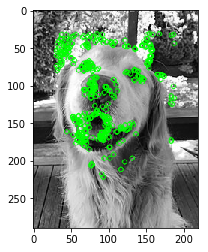

(<matplotlib.image.AxesImage at 0x7f6ade34e4a8>, None)

In [13]:
# código de teste aqui. 

img = cv.imread('cachorro.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()
k,des=return_descriptor(img)
img2 = cv.drawKeypoints(img, k, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

### Casamento de pontos de interesse

O OpenCV possui duas técnicas de casamento de pontos de interesse implementadas: `cv2.BFMatcher` e `cv2.FlannBasedMatcher`. Para exercitar a compreensão do algoritmo de casamento vamos implementar nossa própria versão do `BFMatcher`. 

----------

Sim, no projeto vocês podem usar as implementações do OpenCV. Na próxima aula iremos usar o `FlannBasedMatcher` e usar um novo critério para casamento de pontos. 

----------

#### Exercício:

Implemente uma função `reciprocal_math(desc1, desc2)` que faz o casamento dos descritores passados como argumento. Um par de descritores $(d^1_i, d^2_j)$ *casa* se $dist(d^1_i, d^2_j) < dist(d^1_k, d^2_j), k\neq i$ **E** $dist(d^1_i, d^2_j) < dist(d^1_i, d^2_k), k\neq j$. Como função de distância tem duas opções:

1. Se os dados computados pelo seu descritor forem um vetor de float você pode usar a norma $\ell_2$ da diferença dos vetores

$$
dist(d^1_i, d^2_j) = ||d^1_i - d^2_j||_2
$$


2. Se os dados computados forem um vetor de bits você deve usar como distância o número de bits diferentes entre as duas strings. Isto pode ser feito, em Python, em três passos:
    1. Vetores de bits são representados por vetores de inteiros de 8 bits. Para cada um dos inteiros:
    2. Converta-o para uma string contendo sua representação em binário usando a função `format`.
    3. Conte o número de caracteres diferentes nas strings

Para que nossa função `reciprocal_match` seja integrada ao OpenCV precisamos retornar uma lista de objetos do tipo `cv2.DMatch`. Para criar um objeto deste tipo basta chamar o construtor com três parâmetros:

1. índice $i$ do descritor da imagem de pesquisa
2. índice $j$ do descritor da imagem do banco
3. distância calculada como a fórmula acima

In [14]:
# implementar função reciprocal_match aqui
def calc_dist(list1, list2):
    dist = 0
    string1 = '{}'.format(list1)
    string2 = '{}'.format(list2)
    for j in range(len(string1)):
        if(string1[j] != string2[j]):
            dist +=1
    return dist
    

def reciprocal_match(desc1, desc2):
    matches = []
    for i in range (len(desc1)):
        min_dist = calc_dist(desc1[i], desc2[0])
        index2 = 0
        for j in range(1, len(desc2)):
            min_actual = calc_dist(desc1[i], desc2[j])
            if(min_actual < min_dist):
                min_dist = min_actual
                index2 = j
        min_dist2 = calc_dist(desc1[0], desc2[j])
        index1 = 0
        for k in range (len(desc1)):
            min_actual = calc_dist(desc2[j], desc1[k])
            if(min_actual < min_dist2):
                min_dist2 = min_actual
                index1 = k
                if(index1 == i):
                    matches.append(cv.DMatch(index1, index2, min_dist2))
    return matches

Vamos analisar os resultados dessa função de casamento usando as imagens *cachorro2.png* e *cidade.jpeg*. Extraia os descritores de ambas e faça um casamento com os descritores extraídos no exercício anterior. Para mostrar os resultados você pode usar a função [`cv2.DrawMatches()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#ga7421b3941617d7267e3f2311582f49e1). Mostre também a distância média dos casamentos encontrados. Para comparar, mostre a distância média dos 100 casamentos com menor distância para cada imagem.

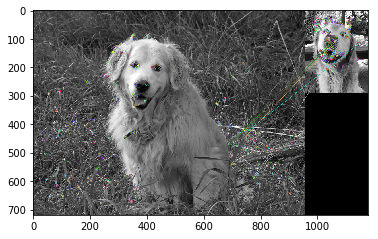

(<matplotlib.image.AxesImage at 0x7f6adc170a20>, None)

In [19]:
# cachorro2.png
img_cao2 = cv.imread('cachorro2.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()
k,des=return_descriptor(img_cao2)
k2,des2=return_descriptor(img)
img_cao2 = cv.drawMatches(img_cao2,k,img,k2,reciprocal_match(des, des2),None)
plt.imshow(img_cao2), plt.show()

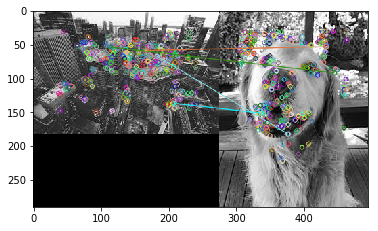

(<matplotlib.image.AxesImage at 0x7f6ade23f2b0>, None)

In [18]:
# cidade.jpeg
img_cidade = cv.imread('cidade.jpeg',0)

# Initiate ORB detector
orb = cv.ORB_create()
k,des=return_descriptor(img_cidade)
k2,des2=return_descriptor(img)
img_cidade = cv.drawMatches(img_cidade,k,img,k2,reciprocal_match(des, des2),None)
plt.imshow(img_cidade), plt.show()

Em ambos os casos houveram muitos casamentos, mas a distância média foi (deveria ser) menor no caso do cachorro. Modifique a função `reciprocal_match` para receber um terceiro argumento que representa a distância máxima entre descritores para que o casamento seja válido. Determine, então, um valor que torne o número de descritores encontrados nas imagens acima significativamente diferente. 

In [20]:
# seu código aqui
def calc_dist(list1, list2):
    dist = 0
    string1 = '{}'.format(list1)
    string2 = '{}'.format(list2)
    for j in range(len(string1)):
        if(string1[j] != string2[j]):
            dist +=1
    return dist
    

def reciprocal_match(desc1, desc2,max_distance):
    matches = []
    for i in range (len(desc1)):
        min_dist = calc_dist(desc1[i], desc2[0])
        index2 = 0
        for j in range(1, len(desc2)):
            min_actual = calc_dist(desc1[i], desc2[j])
            if(min_actual < min_dist):
                min_dist = min_actual
                index2 = j
        min_dist2 = calc_dist(desc1[0], desc2[j])
        index1 = 0
        for k in range (len(desc1)):
            min_actual = calc_dist(desc2[j], desc1[k])
            if(min_actual < min_dist2):
                min_dist2 = min_actual
                index1 = k
                if(index1 == i):
                    if(min_dist2<=max_distance):
                        matches.append(cv.DMatch(index1, index2, min_dist2))
    return matches

Teste o valor determinado com a imagem *cachorro3.jpg*. Comente os resultados obtidos.

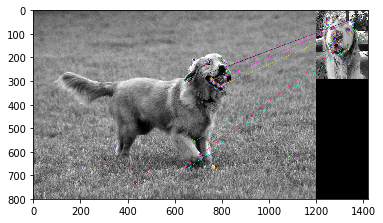

(<matplotlib.image.AxesImage at 0x7f6adc090668>, None)

In [25]:
# cachorro3.jpg
img_cao3 = cv.imread('cachorro3.jpg',0)

# Initiate ORB detector
orb = cv.ORB_create()
k,des=return_descriptor(img_cao3)
k2,des2=return_descriptor(img)
img_cao3 = cv.drawMatches(img_cao3,k,img,k2,reciprocal_match(des, des2,300),None)
plt.imshow(img_cao3), plt.show()

### Juntando tudo

Use as funções acima para calcular a similaridade entre duas imagens, definida como a proporção de pontos casados em relação ao número de pontos da imagem de pesquisa $Q$. Sua função deve se chamar `similarity_proportion_matches` e deve receber duas imagens como entrada e retornar um número entre $0$ (totalmente diferente) e $1$ (idênticas). 

1. Detecte os pontos de interesse e extraia os descritores $\{q_j\}$ de $Q$
2. Para cada imagem $F^i$:
    - Detecte os pontos de interesse e extraia os descritores $\{F_k\}$ de $F^i$ 
    - Para cada descritor $q_j$, verifique se existe um descritor $F_k$ que casa com ele
    - Calcule a proporção de descritores de $Q$ que casaram com descritores de $F^i$ e use este valor como a similaridade entre as duas imagens.
    
3. Retorne as 5 imagens com maior similaridade;

In [26]:
# seu código aqui
def similarity_proportion_matches(img1,img2):
    q,des1=return_descriptor(img1)
    F,des2=return_descriptor(img2)
    matches=reciprocal_match(des1, des2,300)
    proportion=len(matches)/len(q)
    return proportion

Rode sua função com as imagens usadas no exercício anterior e verifique se sua função de similaridade ordenaria as imagens de maneira satisfatória.

In [27]:
# um teste da função similaridade
similarity_proportion_matches(img_cao2,img_cao3)

0.014

### Testes e avaliação crítica dos resultados

Você deve agora executar seu código nas imagens da base de dados sugerida no começo do roteiro. São presentes apenas imagens com 4 objetos diferentes: pessoas, motos, bicicletas e carros. Selecione uma imagem de cada tipo e mostre as 3 imagens com maior similaridade para cada uma delas.

In [28]:
img = cv.imread('cachorro.jpg',0)
cidade = cv.imread('cidade.jpeg',0)
img_cao2 = cv.imread('cachorro2.jpg',0)
img_cao3 = cv.imread('cachorro3.jpg',0)

In [29]:
# busca 1
# um teste da função similaridade
similarity_proportion_matches(img_cao2,img)

0.01

In [ ]:
# busca 2
# um teste da função similaridade
similarity_proportion_matches(img_cao3,img)

In [ ]:
# busca 3
# um teste da função similaridade
similarity_proportion_matches(cidade,img)

In [ ]:
# busca 4
# um teste da função similaridade
similarity_proportion_matches(img,img)

*Meus comentários sobre os resultados aqui*

Faça agora uma busca usando uma imagem focada em um outro objeto qualquer e mostre as 3 imagens mais similares abaixo. 

*Meus comentários sobre os resultados aqui*

### Análise crítica e Revisão de conceitos

Descreva com suas próprias palavras o quê são pontos de interesse e descritores.  

*sua resposta aqui*

Construimos uma abordagem que ordenou as três imagens testadas. Comente uma desvantagem desta abordagem. 

*sua resposta*